In [3]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import statistics

In [68]:
""" 
Player class reads in player stats data and returns different statistics, true shooting percentage, and efficiency of players.
"""
class Player():
    playerstats = pd.read_csv("NBA_Player_Stats.csv")
    league = "NBA"
    mvp_status = ["mvp"]
    """
    Constructor for a player object. Takes in the player's name and season.
    """
    def __init__(self, player, season):
        playerstats = pd.read_csv("NBA_Player_Stats.csv")
        #player, position, season, fg, fga, fg_percent, tp, tpa, tp_percent, ft, fta, ft_percent, pts
        self.player = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["Player"]
        self.position = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["Pos"]
        self.season = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["Year"]
        self.fga = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FGA"]
        self.fg = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FG"]
        self.fg_percent = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FG%"]
        self.tpa = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["3PA"]
        self.tp = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["3P"]
        self.tp_percent = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["3P%"]
        self.fta = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FTA"]
        self.ft = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FT"]
        self.ft_percent = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["FT%"]
        self.pts = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["PTS"]
        self.ast = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["AST"]
        self.tov = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["TOV"]
        self.mp = playerstats.loc[playerstats["Player"] == player].loc[playerstats["Year"] == season]["MP"]
        
    """
    Returns statistics of choice if they exists in the dataset. Else, throws an error.
    """ 
    def get_statistic(self, statistic):
        statistic_noncap = statistic.lower()
        if hasattr(self, statistic_noncap) == True:
            return round(getattr(self, statistic_noncap).values[0],2)
        else:
            print( "Oops! We don't have that statistics. Try again!" )
        
    """ 
    Calculates and returns true shooting percentage of the player.
    """
    def true_shooting(self):
        ts = (self.pts)/(2*(self.fga + (0.44 * self.fta)))
        return round(ts.values[0],2)
    
    """ 
    Calculates and returns the efficiency of the player.
    """
    def efficiency(self):
        efg = (self.fg + (0.5 * self.tp))/(self.fga)
        return round(efg.values[0],2)
    
    def ast_tov(self):
        ast_tov = self.ast/self.tov
        return round(ast_tov.values[0],2)
    
    def per_36_minutes(self, statistic):
        statistic_noncap = statistic.lower()
        if hasattr(self, statistic_noncap) == True:
            return round((((getattr(self, statistic_noncap).values[0])/self.mp)*36).values[0],2)
        else:
            print( "Oops! We don't have that statistics. Try again!")
    
    # the formula is 100 * TOV / (FGA + 0.44 * FTA + TOV). Turnover percentage is an estimate of turnovers per 100 plays.
    def turnover_percentage(self):
        turnover = (100*self.tov)/((self.fga + (0.44*self.fta) + self.tov))
        return round(turnover.values[0],2)

    def visualization(self, statistic):
        playerstats = pd.read_csv("NBA_Player_Stats.csv")
        playermask = playerstats["Player"] == str(self.player.values[0])
        singlestats = playerstats[playermask]
        sns.lineplot(x = singlestats["Year"], y = singlestats[statistic])
        plt.xticks(rotation = 45)
        plt.title(f"{self.player.values[0]}'s {statistic} Per Season")
        plt.xlabel("Season")
        plt.show()
    
    def compare_player(self, another_player):
        playerstats = pd.read_csv("NBA_Player_Stats.csv")
        playermask = playerstats["Player"] == str(self.player.values[0])
        singlestats = playerstats[playermask]
        secondplayermask = playerstats["Player"] == str(another_player)
        otherstats = playerstats[secondplayermask]
        if len(otherstats) == 0:
            return("This player either does not exist or the statistics for them are unavailable :( sorry")
        if len(singlestats) >= len(otherstats):
            sns.lineplot(x = singlestats["Year"], y = singlestats["PTS"], label = str(self.player.values[0]))
            #plt.plot(singlestats["PTS"], label = str(self.player.values[0]))
            plt.plot(otherstats["Year"], otherstats["PTS"], label = another_player)
            plt.xticks(rotation = 45)
            plt.xlabel("Season")
            plt.ylabel("Points")
            plt.title(f"{self.player.values[0]} vs {another_player}'s Points Per Season")
            plt.legend()
            plt.show()
        else:
            sns.lineplot(x = otherstats["Year"], y = otherstats["PTS"], label = another_player)
            #plt.plot(singlestats["PTS"], label = str(self.player.values[0]))
            plt.plot(singlestats["Year"], singlestats["PTS"], label = str(self.player.values[0]))
            plt.xticks(rotation = 45)
            plt.xlabel("Season")
            plt.ylabel("Points")
            plt.title(f"{self.player.values[0]} vs {another_player}'s Points Per Season")
            plt.legend()
            plt.show()

In [69]:
# Test for the functions
Curry = Player(player = "Stephen Curry", season = "2015-2016")

In [70]:
Curry.turnover_percentage()

12.82

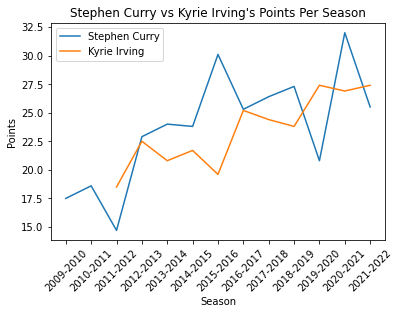

In [72]:
Curry.compare_player("Kyrie Irving")

In [27]:
LeBron = Player(player = "LeBron James", season = "2015-2016")

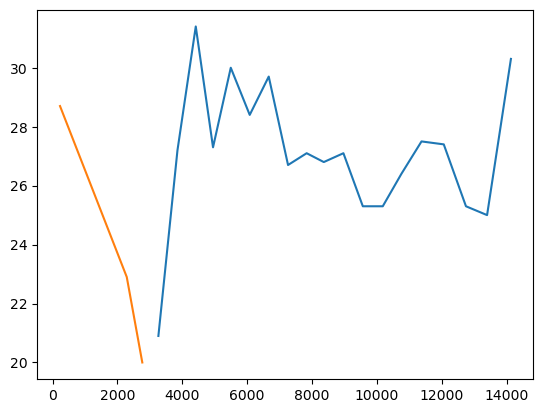

In [28]:
LeBron.compare_player("Michael Jordan*")

/Users/phamlethuylinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/phamlethuylinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/phamlethuylinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/phamlethuylinh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

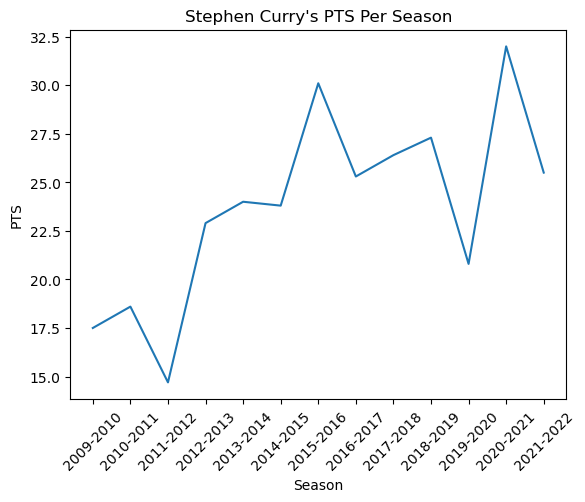

In [34]:
Curry.visualization("PTS")

In [15]:
df = pd.read_csv("NBA_Team_Stats.csv")

In [16]:
df.head()

,No,Team,G,Min,Pts,Reb,Ast,Stl,Blk,To,...,Oreb,Fgm-a,Pct,3gm-a,Pct.1,Ftm-a,Pct.2,Eff,Deff,Year
0,1,Chicago,103,48.4,96.0,44.1,23.1,8.6,4.3,13.0,...,14.9,36.7-81.7,0.449,3.9-12.0,0.323,18.7-25.2,0.741,111.6,17.5,1997-1998
1,2,Utah,102,48.3,98.6,40.8,24.7,7.6,4.8,14.7,...,11.3,35.9-74.3,0.483,3.1-8.4,0.368,23.8-30.9,0.768,116.3,17.5,1997-1998
2,3,Phoenix,86,48.6,99.3,41.9,25.6,9.2,5.3,14.4,...,12.1,38.2-82.0,0.466,5.2-14.7,0.355,17.7-23.6,0.747,117.1,13.6,1997-1998
3,4,L.A.Lakers,95,48.3,104.8,42.9,24.3,8.7,6.8,14.7,...,13.2,38.0-79.1,0.480,6.1-17.3,0.350,22.8-33.7,0.675,120.8,13.2,1997-1998
4,5,San Antonio,91,48.4,92.5,44.1,21.9,6.2,6.9,15.3,...,11.9,35.1-75.1,0.468,3.7-10.8,0.344,18.5-26.8,0.688,108.0,13.1,1997-1998


In [17]:
LeBron = Player(player = "LeBron James", season = "2015-2016")

In [18]:
Curry.ast_tov()

2.03

In [19]:
Curry.get_statistic("FTA")

5.1

In [20]:
Curry.get_statistic("HPA")

Oops! We don't have that statistics. Try again!


In [21]:
Curry.true_shooting()

0.67

In [22]:
Curry.efficiency()

0.63

In [23]:
Curry.per_36_minutes("PTS")

31.68